
Epoch [1/50]


Train Loss: 28.7487, Train Acc: 48.48%
Val Loss: 4.0514, Val Acc: 76.60%

Epoch [2/50]


Train Loss: 3.0630, Train Acc: 84.15%
Val Loss: 4.7896, Val Acc: 79.79%

Epoch [3/50]


Train Loss: 1.4154, Train Acc: 91.84%
Val Loss: 0.2763, Val Acc: 96.81%

Epoch [4/50]


Train Loss: 0.8807, Train Acc: 94.64%
Val Loss: 1.0780, Val Acc: 93.62%

Epoch [5/50]


Train Loss: 0.5395, Train Acc: 96.27%
Val Loss: 0.0311, Val Acc: 98.94%

Epoch [6/50]


Train Loss: 0.2551, Train Acc: 97.67%
Val Loss: 0.1434, Val Acc: 98.94%

Epoch [7/50]


Train Loss: 0.4211, Train Acc: 98.14%
Val Loss: 0.0037, Val Acc: 100.00%

Epoch [8/50]


Train Loss: 0.1176, Train Acc: 98.83%
Val Loss: 0.1166, Val Acc: 98.94%

Epoch [9/50]


Train Loss: 0.3468, Train Acc: 98.14%
Val Loss: 0.0971, Val Acc: 98.94%

Epoch [10/50]


Train Loss: 0.2882, Train Acc: 98.14%
Val Loss: 0.1029, Val Acc: 98.94%

Epoch [11/50]


Train Loss: 0.2176, Train Acc: 97.20%
Val Loss: 0.0388, Val Acc: 97.87%

Epoch [12/50]


Train Loss: 0.2859, Train Acc: 97.20%
Val Loss: 0.4328, Val Acc: 96.81%
Early stopping triggered

Best Validation Accuracy: 100.00%


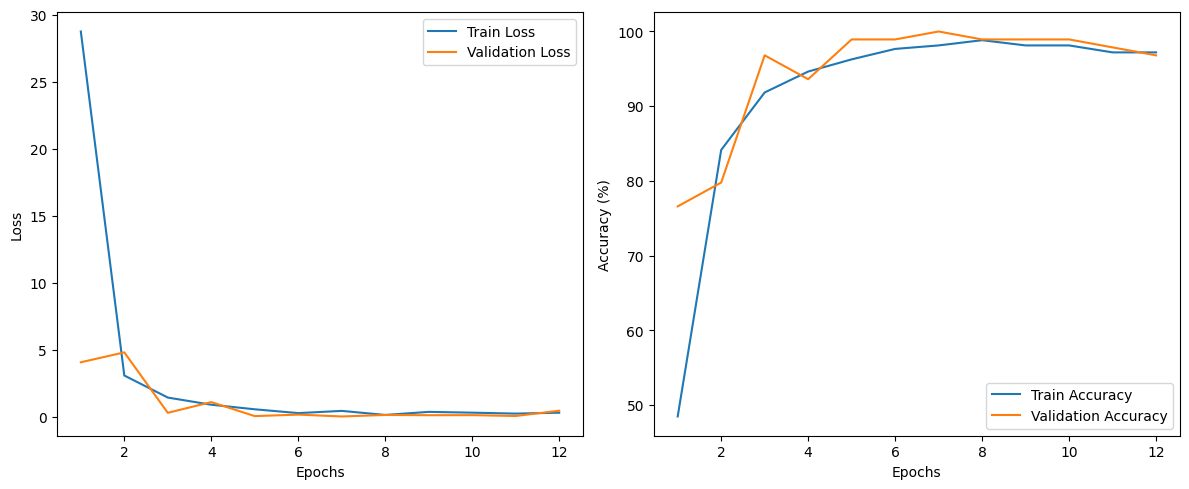


Final Evaluation Report:

              precision    recall  f1-score   support

           1     0.8571    1.0000    0.9231        18
           2     1.0000    1.0000    1.0000        18
           3     1.0000    0.8500    0.9189        20
           4     1.0000    1.0000    1.0000        20
           5     1.0000    1.0000    1.0000        18

    accuracy                         0.9681        94
   macro avg     0.9714    0.9700    0.9684        94
weighted avg     0.9726    0.9681    0.9680        94



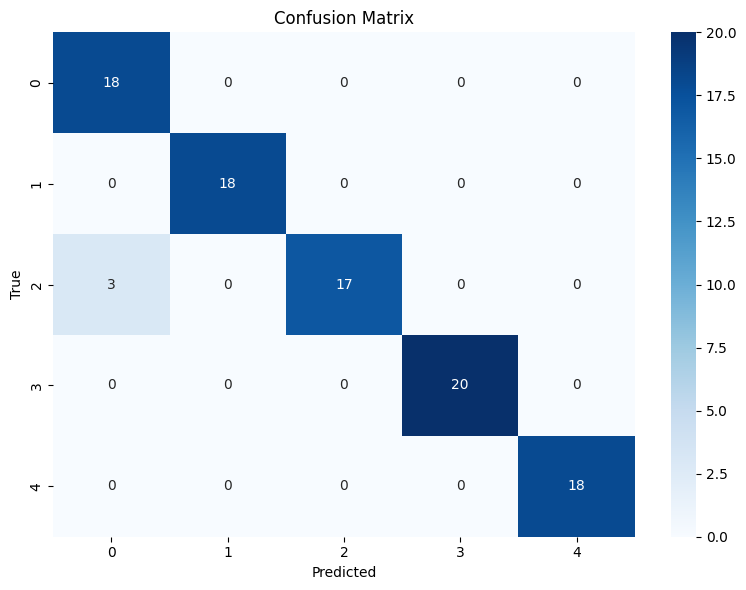

In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from utils.train_immagini import train_model
from utils.dataset_immagini import ImmaginiDataset
from models.model_immagini import CNNModel

if __name__ == "__main__":
    data_dir = './data'
    batch_size = 32
    img_size = 224
    num_epochs = 50
    learning_rate = 0.001
    patience = 5
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    torch.manual_seed(42)

    train_dataset = ImmaginiDataset(data_dir, split="train", img_size=img_size, shuffle=True)
    val_dataset = ImmaginiDataset(data_dir, split="val", img_size=img_size)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = CNNModel(num_classes=len(train_dataset.classes)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_model(train_loader, val_loader, model, criterion, optimizer, num_epochs=num_epochs, device=device, patience=patience)
